# Lab 6: Classification in Scikit-Learn
**Data Science for Biologists** &#8226; University of Washington &#8226; BIOL 419/519 &#8226; Winter 2019

Course design and lecture material by [Bingni Brunton](https://github.com/bwbrunton) and [Kameron Harris](https://github.com/kharris/). Lab design and materials by [Eleanor Lutz](https://github.com/eleanorlutz/), with helpful comments and suggestions from Bing and Kam.

### Table of Contents
1. Review of importing and inspecting data
2. Split a dataset into a training and test set
3. Train a machine learning classifier using scikit-learn
4. Bonus exercises

### Helpful resources
- [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas
- [An introduction to machine learning with Scikit-Learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)
- [Scikit-Learn user guide](https://scikit-learn.org/stable/user_guide.html)
- [Scikit-Learn Cheat Sheet](https://datacamp-community-prod.s3.amazonaws.com/5433fa18-9f43-44cc-b228-74672efcd116) by Python for Data Science

### Data
- The data in this lab is originally from [USA Forensic Science Service](https://archive.ics.uci.edu/ml/datasets/Glass+Identification) and was edited for teaching purposes. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

This week's lab requires plotting several different classifications in different colors, so set the default matplotlib style to a colorblind-friendly setting:

In [2]:
plt.style.use("seaborn-colorblind")

## Lab 6 Part 1: Review of importing and inspecting data

This week's data is from the USA Forensic Science Service, and contains information about 214 samples from seven different types of glass (vehicle windows, tableware, headlamps, etc). By analyzing various properties of the glass, such as the refractive index or the proportion of different chemical elements (Na, Mg, Al, etc.), this dataset can be used to predict the source of unknown glass found at crime scenes. 

**Exercise 1:** Read in the dataset in the file `"./data/Lab_06/glass_properties_data.csv"` as a `Pandas` dataframe called `df`. Display the `head()` of the data and `describe()` the dataframe to make sure your `df` variable was imported properly and has the expected columns. 

In [3]:
df = pd.read_csv("./data/Lab_06/glass_properties_data.csv")

display(df.head())
display(df.describe())

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## Lab 6 Part 2: Split the dataset into a training set and test set

Using this dataset, we would like to create a machine learning classifier that can be used to categorize unknown glass samples. 

A machine learning classifier is trained based on one particular set of data. A separate dataset is used to evaluate the accuracy of the classifier. For this lab we'll use 70% of the data for training and save the remaining 30% for testing the classifier. This means that we first need to separate a random 70% of the data into a `train_data` variable, and the other 30% into a different `test_data` variable. 

<img src="http://ataspinar.com/wp-content/uploads/2016/12/classification.png">

*Credit:* A schematic overview of the classification process, by Ahmet Taspinar

**Exercise 2:** Each sample in this dataset has an `ID` number from 1 to 214. Create a `numpy` vector called `indices` that contains all of the index numbers (all integers from 1 to 214). We will use this vector to shuffle the data `ID`s and separate the `ID`s into training and testing groups. Print the vector. 

In [4]:
indices = np.arange(1, 215)
print(indices)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214]


**Exercise 3:** The `np.random.shuffle()` function can be used to randomly shuffle everything stored in a list or `numpy` array. Run the following code block and confirm that the ID numbers stored in `indices` has indeed been shuffled: 

In [5]:
np.random.shuffle(indices)
print(indices)

[ 98 140  35 192 166 184 146 143 128 117 173 201  93  53  81 119  31  75
 110 131 154 101 182 133 161 116  82  67  78 103 207 104  80  24 191   1
 155  17 205  52 107   4 180 169 195 145 114  59  86  20  87 204   7  83
 137 156 186  28 147 167  46 177 210 122 157  32 115 118 132  13 136  63
 199  73 111  60  58   5  22 209  95 165 170  49 185 194  15 190 142  61
  92 164 181  96 135 188  21  26 174 126 183  47  11 152  51 187 102  30
 148 214 121 206  69  77  10  84 160 162  36 213  16  23  71  34  76 109
 141  25 171 197  90  18 203  79 139 150 163 124  74  14 200 212 158 113
 138 198 151  55 129  56  37  64  39  85 123  70 202 208  72  44  48 172
   3 168  50  27 127  42 149  43  38  88  65 108 105  40 175 106  57 178
 193   2 120  62  12 189 153  29  33 196  19  66 100   9  99  91   6 112
  89 125 134 176  68 211  54 144  94 179 159   8 130  41  97  45]


**Exercise 4:** If we take the first 70% of the shuffled `indices` array, this should contain all of the data ID numbers to use for our training dataset. Create a variable called `train_indices` that contains just the first 70% of `indices`. Create another variable called `test_indices` that contains the rest of `indices`. If `indices` is not divisible into clean 70%-30% segments, you can round to the nearest number. Print the length of `train_indices` and `test_indices`. Print `test_indices`.

In [6]:
split_index = int(len(indices)*0.7)
train_indices = indices[0:split_index]
test_indices = indices[split_index:]

print("Length of train_indices is:", len(train_indices))
print("Length of test_indices is:", len(test_indices))
print(test_indices)

Length of train_indices is: 149
Length of test_indices is: 65
[ 56  37  64  39  85 123  70 202 208  72  44  48 172   3 168  50  27 127
  42 149  43  38  88  65 108 105  40 175 106  57 178 193   2 120  62  12
 189 153  29  33 196  19  66 100   9  99  91   6 112  89 125 134 176  68
 211  54 144  94 179 159   8 130  41  97  45]


Now we have two variables that hold the `ID` numbers for a randomized selection of 70% and 30% of the data. We can now use these `ID` numbers to separate the data into training and test sets: 

In [7]:
train_data = df[df["ID"].isin(train_indices)]
test_data = df[df["ID"].isin(test_indices)]

**Exercise 5:** Evaluate the `train_data` dataframe you just constructed to make sure it looks correct, using the following steps:
- Print the number of rows in `train_data` and the original data. 
- Print the percentage of rows in the original data is included in `train_data`. Is this close to the expected 70%?
- Display the `head()` of the `train_data` dataframe and see if the data is a random selection of the original. *Hint:* Look at the index of the dataframe.

In [8]:
print("Rows in original data is", len(df))
print("Rows in training data is", len(train_data), 
      "which is", 100*len(train_data)/len(df), "% of the original data")

train_data.head()

Rows in original data is 214
Rows in training data is 149 which is 69.62616822429906 % of the original data


,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


**Exercise 6:** Evaluate the `test_data` dataframe similarly to make sure it looks correct:
- Print the number of rows in `test_data`. 
- Print the percentage of rows in the original data is included in `test_data`. Is this close to the expected 30%?
- Display the `head()` of the `test_data` dataframe and see if the data is a random selection of the original.
- Does the number of rows in `test_data` and `train_data` add up to the number of rows in the full data? 

In [9]:
print("Rows in test data is", len(test_data), 
      "which is", 100*len(test_data)/len(df), "% of the original data")
print("Test and train datasets add up to", len(test_data)+len(train_data))
test_data.head()

Rows in test data is 65 which is 30.373831775700936 % of the original data
Test and train datasets add up to 214


,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1


### Splitting data using Pandas

Instead of dividing the data into training and test sets manually, `pandas` also has a builtin function to sample a random subset of the dataset (as do other libraries including `scikit-learn`. The previous data splitting can also be done in two lines (for future reference):

In [10]:
train_data = df.sample(frac=0.7)
test_data = df.drop(train_data.index)

## Lab 6 Part 3: Train a machine learning classifier using scikit-learn

Like `numpy` or `pandas`, [scikit-Learn](https://scikit-learn.org/stable/) is a python library for machine learning. In today's lab we will make a Linear Discriminant Analysis classifier by importing this function from the `sklearn.discriminant_analysis` module. 

### Linear Discriminant Analysis

In class we discussed the Linear Discriminant Analysis method for two variables. The scikit-learn library can also extrapolate this principle to run a LDA on many variables. To run a LDA on our dataset we will import the `LDA` function from the Scikit learn (`sklearn`) library.

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

To use the `LinearDiscriminantAnalysis` function we need to first separate the data into the data itself and the classifications:

In [12]:
train_class = train_data["Glass_Type"] # known classification answers
train_vals = train_data.drop(["Glass_Type", "ID"], axis=1) # corresponding values 
# make sure to drop the ID since it is not a characteristic of the glass

display(train_class.head())
display(train_vals.head())

57     1
178    6
184    6
28     1
115    2
Name: Glass_Type, dtype: int64

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
57,1.51824,12.87,3.48,1.29,72.95,0.60,8.43,0.0,0.0
178,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.0,0.0
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.0
28,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.0,0.0
115,1.51846,13.41,3.89,1.33,72.38,0.51,8.28,0.0,0.0


**Exercise 7:** Similarly, split the `test_data` test dataset into a variable called `test_class` that holds all of the `Glass_Type` classifications, and another variable called `test_vals` that contains the corresponding measurements. 

In [13]:
test_class = test_data["Glass_Type"]
test_vals = test_data.drop(["Glass_Type", "ID"], axis=1)

display(test_class.head())
display(test_vals.head())

4    1
5    1
6    1
7    1
9    1
Name: Glass_Type, dtype: int64

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11


Now that the training data is separated into the values and the known classifier values, these two dataframes can be used to train the classifier:

In [14]:
classifier = LinearDiscriminantAnalysis()
classifier.fit(train_vals, train_class)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

To test the accuracy of the classifier, we can use it to predict the types of glass (classes) for the training data, and see what proportion of the predictions matched the correct answers: 

In [15]:
train_score = classifier.score(train_vals, train_class)
print("Training score is:", train_score)

Training score is: 0.66


The classifier can choose between 7 different glass types, so anything above 1/7 (or 14.29%) is better than chance. The classifier should be performing much better than 14% on the training dataset we scored above. 

But the real evaluation of the classifier is to test its accuracy in predicting the glass classes for data it has never seen before (the test dataset):

In [16]:
test_score = classifier.score(test_vals, test_class)
print("Test score is:", test_score)

Test score is: 0.640625


**Exercise 8:** Compare your test score with two other people in the class. 
- Did you get the same accuracy values? If not, why do you think this might be the case? Explain briefly as a comment below: 
- Is the accuracy of your classifier better or worse for the test data or the training data? Why do you think this is? 

** Answer for Exercise 8:** # Each classifier is trained on a random subset of 70% of the data, so everyone's classifier is different. The accuracy for the test data will typically be worse, because the classifier was not trained on the test data. 

## Lab 6 Bonus exercises

### Comparing different classifiers: LDA vs K-Nearest Neighbors
In class we discussed Nearest Neighbor classification, which classifies an unknown data point as belonging to the same class as its nearest neighboring point. K-Nearest Neighbors extrapolates this approach to more than one neighbor. For example, a 3-nearest neighbor classification looks at the three nearest data points, and picks the most common class from among those three neighbors. 

In `sklearn` a KNN classifier can be imported from the `sklearn.neighbors` module:

In [17]:
from sklearn.neighbors import KNeighborsClassifier

**Bonus Exercise 1:** Evaluate the accuracy of `KNeighborsClassifier()` using the same training and test dataset as used previously in the lab. Is this classification method better than LDA for this dataset?

In [18]:
classifier = KNeighborsClassifier()
classifier.fit(train_vals, train_class)

train_score = classifier.score(train_vals, train_class)
test_score = classifier.score(test_vals, test_class)
print("KNN training score:", train_score, "test score:", test_score)

KNN training score: 0.733333333333 test score: 0.734375


**Bonus Exercise 2:** Look up the documentation for `sklearn KNeighborsClassifier()` to find out how to specify the number of neighbors to use. Make a scatterplot showing the accuracy of the classifier on the test dataset for a range of n-nearest neighbors (1 to 50). How does the number of nearest neighbors affect classifier accuracy?

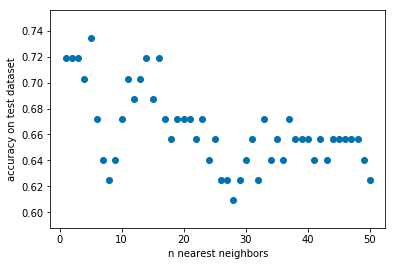

In [19]:
def score_n(n):
    classifier = KNeighborsClassifier(n_neighbors=n)
    classifier.fit(train_vals, train_class)
    test_score = classifier.score(test_vals, test_class)
    return test_score

ns = np.arange(1, 51)
ts = [score_n(n) for n in ns]
plt.scatter(ns, ts)
plt.xlabel("n nearest neighbors")
plt.ylabel("accuracy on test dataset")
plt.show()